In [83]:
#DIABETES DATA MODELLING
#BY BENSON KARANJA
#import the required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [84]:
df=pd.read_csv('/kaggle/input/diabetes-risk-prediction/diabetes_risk_prediction_dataset.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [85]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [86]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [87]:
df.drop(df[df['Age'] <= 20].index, axis=0, inplace=True)
df.describe()


,Age
count,519.000000
mean,48.090559
std,12.081348
min,25.000000
25%,39.000000
50%,48.000000
75%,57.000000
max,90.000000


In [88]:
df1 = df.drop(['Age'], axis=1)
df1

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [89]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# List of specific columns to encode
columns_to_encode = [
    'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
    'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
    'Irritability', 'delayed healing', 'partial paresis',
    'muscle stiffness', 'Alopecia', 'Obesity', 'class'
]

# Apply LabelEncoder to each specified column
for col in columns_to_encode:
    df1[col] = le.fit_transform(df1[col])
df1

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [90]:
len(df1[df1['class'] ==0])


200

In [91]:
len(df1[df1['class'] ==1])

319

**Model building**# 

In [92]:
x=df1.drop('class',axis=1)
y=df1['class']

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [94]:


models_and_parameters = [
    {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20],
            'criterion': ['gini', 'entropy']
        }
    },
    {
        'model': SVC(),
        'params': {
            'kernel': ['linear', 'rbf'],
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        }
    },
    {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    }
]

# Loop through models and perform GridSearchCV
best_estimators = {}
for item in models_and_parameters:
    model = item['model']
    params = item['params']
    print(f"Running GridSearchCV for {model.__class__.__name__}...")
    
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(x_train,y_train)
    
    best_estimators[model.__class__.__name__] = {
        'best_model': grid_search.best_estimator_,
        'best_score': grid_search.best_score_
    }
for model_name, info in best_estimators.items():
    print(f"\nBest model for {model_name}:")
    print(f"Model: {info['best_model']}")
    print(f"Accuracy: {info['best_score']:.4f}")


Running GridSearchCV for RandomForestClassifier...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Running GridSearchCV for SVC...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Running GridSearchCV for LogisticRegression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Running GridSearchCV for DecisionTreeClassifier...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Running GridSearchCV for KNeighborsClassifier...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best model for RandomForestClassifier:
Model: RandomForestClassifier(criterion='entropy')
Accuracy: 0.9642

Best model for SVC:
Model: SVC(C=10)
Accuracy: 0.9615

Best model for LogisticRegression:
Model: LogisticRegression(C=10, max_iter=1000)
Accuracy: 0.9091

Best model for DecisionTreeClassifier:
Model: DecisionTreeClassifier()
Accuracy: 0.9560

Best model for KNeighborsClassifier:
Model: KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='dist

In [95]:
model=RandomForestClassifier( n_estimators=100,
    criterion='gini',
    max_depth=None,)
model.fit(x_train,y_train)


RandomForestClassifier()

In [96]:
model.score(x_train,y_train)

0.9917355371900827

In [97]:
model.predict(x_test)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0])

In [98]:
model.score(x_test,y_test)

0.9871794871794872

In [110]:
predictions=model.predict(x_test)

In [113]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)

<Axes: >

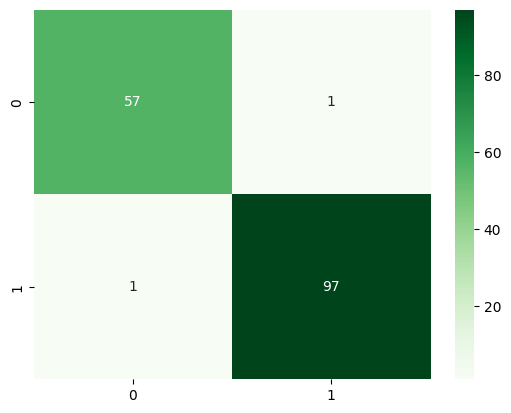

In [118]:
import seaborn as sns
sns.heatmap(cm,annot=True, fmt='d', cmap='Greens', xticklabels=['0', '1'], yticklabels=['0', '1'])

**A Random Forest Classifier was the best model for our data as you can see from the matrix visualization above**# 